<a href="https://colab.research.google.com/github/pachterlab/GVFP_2021/blob/dev/gg220626_bf_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
n_cells=[4674, 4394, 3335, 4820]

In [12]:
samples = ['allen_C01_glu','allen_B08_glu','allen_H12_glu','allen_F08_glu']
g_ext = ['App', 'Cyfip2', 'Gnaq', 'Grin2b', 'Gsk3b', 'Kifap3', 'Mycbp2',
       'Prrc2c', 'Unc80']
g_gou = ['Adcy2', 'Atxn1', 'Cdh12', 'Edil3', 'Igf1r', 'Kcnk2', 'Mbnl2',
       'Meg3', 'Plxna4', 'Satb1', 'Scai', 'Sez6l', 'Slc35f1']
g_cir = ['Cox6b1', 'Mdh1', 'Ndfip1', 'Ndfip2', 'Pitpnc1', 'Slc24a3',
       'Stmn3']
genes =  g_ext + g_gou + g_cir
       


In [13]:
len(g_ext)

9

In [14]:
len(g_cir)

7

In [15]:
len(genes)

29

In [16]:
n_genes = len(genes)
n_samples = len(samples)

In [17]:
import scipy
from scipy import special

These log-BFs still seem very inflated. It would be nice to check that the computation is correct.

In [18]:
BF = np.empty((n_samples,n_genes))
BF[:] = np.nan

# p_gou = 
for j in range(n_samples):
    for i in range(n_genes):
        logL_GOU = np.loadtxt('logL_'+samples[j]+'_'+genes[i]+'_GOU.txt')
        logL_CIR = np.loadtxt('logL_'+samples[j]+'_'+genes[i]+'_CIR.txt')
        # BF[j,i] = (scipy.special.logsumexp(logL_CIR,b=1/n_cells[j]) - scipy.special.logsumexp(logL_GOU,b=1/n_cells[j]))/np.log(10)
        w_ = np.asarray([0.5,0.5])/np.prod(logL_GOU.shape)
        BF[j,i] = (scipy.special.logsumexp(logL_CIR,b=w_[0]) - scipy.special.logsumexp(logL_GOU,b=w_[1]))/np.log(10)
        # c=np.max(logL_GOU)
        # d=np.max(logL_CIR)
        # llh_GOU = np.exp(logL_GOU-c)
        # llh_CIR = np.exp(logL_CIR-d)
        # lml_GOU = c+np.log(np.mean(llh_GOU))
        # lml_CIR = d+np.log(np.mean(llh_CIR))
        # BF[j,i] = (lml_CIR-lml_GOU)/np.log(10)

Text(0.5, 0, 'Bayes factor: (+) CIR, $(-) \\ \\Gamma$-OU)')

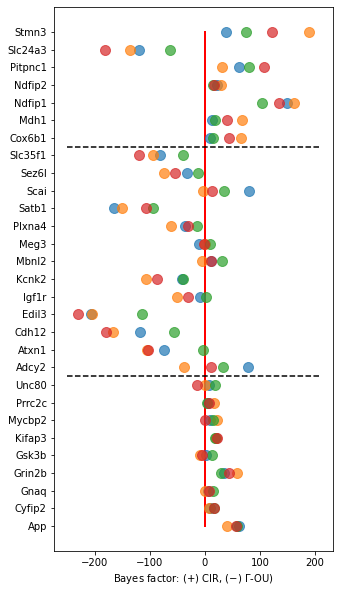

In [19]:
plt.figure(figsize=(5,10))

plt.plot([0,0],[0,28],'r-',linewidth=2)
plt.plot(BF.T,range(len(genes)),'.',markersize=20,alpha=0.7)
plt.yticks(ticks=range(len(genes)),labels=genes)

xl = plt.gca().get_xlim()
plt.plot(xl,[(len(g_ext)-0.5)]*2,'k--')
plt.plot(xl,[(len(g_ext)+len(g_gou)-0.5)]*2,'k--')
plt.xlabel(r'Bayes factor: (+) CIR, $(-) \ \Gamma$-OU)')

Text(0.5, 0, 'Bayes factor: (+) CIR, $(-) \\ \\Gamma$-OU)')

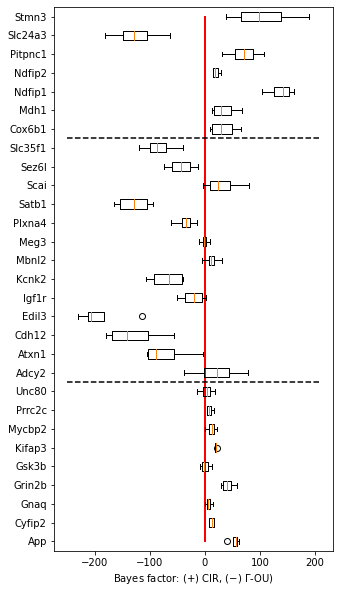

In [20]:
plt.figure(figsize=(5,10))

plt.plot([0,0],[0,28],'r-',linewidth=2)
plt.boxplot(BF,positions=range(len(genes)),vert=False)
plt.yticks(ticks=range(len(genes)),labels=genes)

plt.plot(xl,[(len(g_ext)-0.5)]*2,'k--')
plt.plot(xl,[(len(g_ext)+len(g_gou)-0.5)]*2,'k--')
plt.xlabel(r'Bayes factor: (+) CIR, $(-) \ \Gamma$-OU)')

In [10]:
import pickle   
w_g = list(pickle.load(open('./weights_and_genes.pickle','rb')))

In [11]:
dataset_filter = [0,1,3,4,5]
gn = w_g[3]
w_g[0] = w_g[0][dataset_filter]
w_g[1] = [w_g[1][x] for x in dataset_filter]
thr = 0.8
cir_filt = (w_g[0][:,2,:]>thr).all(0)
gou_filt = (w_g[0][:,0,:]>thr).all(0)
ext_filt = (w_g[0][:,1,:]>thr).all(0)

In [12]:
genes_list = list(np.concatenate((gn[ext_filt] , gn[gou_filt] , gn[cir_filt])))


In [17]:
genes_ind = [np.where(gn==x)[0][0] for x in genes_list]

In [19]:
w_g[0].shape

(5, 3, 2130)

In [22]:
w_cir = w_g[0][:,2,genes_ind].mean(0)

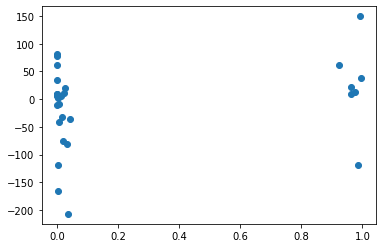

In [27]:
plt.scatter(w_cir,BF[0])
# plt.scatter(range(len(genes)),BF[1])
# plt.scatter(range(len(genes)),BF[2])